<a href="https://colab.research.google.com/github/Datag4rcia/AAPL/blob/main/trab_de_programa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hábitos dos Estudantes vs Perfomance Acadêmica
Este é um conjunto de dados simulado que explora como os hábitos de vida afetam o desempenho acadêmico dos alunos. Com 1.000 registros sintéticos de alunos e mais de 15 recursos, incluindo horas de estudo, padrões de sono, uso de mídias sociais, qualidade da dieta, saúde mental e notas de provas finais.

## Carregamento das bibliotecas e do dataset

In [14]:
!pip install plotly.express
!pip install plotly.graph_objects
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install stats
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy as sc
import stats as st
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ERROR: Could not find a version that satisfies the requirement plotly.graph_objects (from versions: none)
ERROR: No matching distribution found for plotly.graph_objects


In [15]:
df= pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# Análise Exploratória

In [16]:
df.tail()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


In [17]:
df.dtypes

,0
student_id,object
age,int64
gender,object
study_hours_per_day,float64
social_media_hours,float64
netflix_hours,float64
part_time_job,object
attendance_percentage,float64
sleep_hours,float64
diet_quality,object


In [18]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [20]:
df.isna().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [21]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


## Limpeza e Tratamento de dados

In [22]:
#Como o data frame não tem correções para fazer, vamos criptografar as palavras para facilitar a análise

from sklearn.preprocessing import LabelEncoder

x = LabelEncoder()
df['gender_encoded'] = x.fit_transform(df['gender'])
df['part_time_job_encoded'] = x.fit_transform(df['part_time_job'])
df['diet_quality_encoded'] = x.fit_transform(df['diet_quality'])
df['parental_education_level_encoded'] = x.fit_transform(df['parental_education_level'])
df['internet_quality_encoded'] = x.fit_transform(df['internet_quality'])
df['extracurricular_participation_encoded'] = x.fit_transform(df['extracurricular_participation'])

In [23]:
df.tail()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,internet_quality,mental_health_rating,extracurricular_participation,exam_score,gender_encoded,part_time_job_encoded,diet_quality_encoded,parental_education_level_encoded,internet_quality_encoded,extracurricular_participation_encoded
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,...,Good,6,Yes,76.1,0,0,0,1,1,1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,...,Average,6,Yes,65.9,0,1,2,1,0,1
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,...,Good,9,Yes,64.4,1,0,1,0,1,1
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,...,Average,1,No,69.7,1,1,0,0,0,0
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,...,Average,8,No,74.9,0,0,1,0,0,0


# Manipilação

In [24]:
#Vamos criar uma tabela só com as variáveis numéricas
novo_df = df[['student_id', 'age','gender_encoded','study_hours_per_day',
              'social_media_hours','netflix_hours','part_time_job_encoded',
              'attendance_percentage','sleep_hours','diet_quality_encoded',
              'exercise_frequency','parental_education_level_encoded','internet_quality_encoded',
              'mental_health_rating','extracurricular_participation_encoded','exam_score']]

novo_df.head()

,student_id,age,gender_encoded,study_hours_per_day,social_media_hours,netflix_hours,part_time_job_encoded,attendance_percentage,sleep_hours,diet_quality_encoded,exercise_frequency,parental_education_level_encoded,internet_quality_encoded,mental_health_rating,extracurricular_participation_encoded,exam_score
0,S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
1,S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0
2,S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
4,S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4


In [27]:
#Para ficar mais visualmente bonito, vamos trocar os nomes dos encoders
df =novo_df.rename(columns={'gender_encoded': 'gender',
                        'part_time_job_encoded': 'part_time_job',
                        'diet_quality_encoded': 'diet_quality',
                        'parental_education_level_encoded': 'parental_education_level',
                      	'internet_quality_encoded':'internet_quality',
                        'extracurricular_participation_encoded': 'extracurricular_participation'})
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
1,S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0
2,S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
4,S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4


# Análise Estatistíca


In [30]:
#Correlação
df.corr

<bound method DataFrame.corr of     student_id  age  gender  study_hours_per_day  social_media_hours  \
0        S1000   23       0                  0.0                 1.2   
1        S1001   20       0                  6.9                 2.8   
2        S1002   21       1                  1.4                 3.1   
3        S1003   23       0                  1.0                 3.9   
4        S1004   19       0                  5.0                 4.4   
..         ...  ...     ...                  ...                 ...   
995      S1995   21       0                  2.6                 0.5   
996      S1996   17       0                  2.9                 1.0   
997      S1997   20       1                  3.0                 2.6   
998      S1998   24       1                  5.4                 4.1   
999      S1999   19       0                  4.3                 2.9   

     netflix_hours  part_time_job  attendance_percentage  sleep_hours  \
0              1.1              0                   85.0          8.0   
1              2.3              0                   97.3          4.6   
2              1.3              0                   94.8          8.0   
3              1.0              0                   71.0          9.2   
4              0.5              0                   90.9          4.9   
..             ...            ...                    ...          ...   
995            1.6              0                   77.0          7.5   
996            2.4              1                   86.0          6.8   
997            1.3              0                   61.9          6.5   
998            1.1              1                  100.0          7.6   
999            1.9              0                   89.4          7.1   

     diet_quality  exercise_frequency  parental_education_level  \
0               0                   6                         2   
1               1                   6                         1   
2               2                   1                         1   
3               2                   4                         2   
4               0                   3                         2   
..            ...                 ...                       ...   
995             0                   2                         1   
996             2                   1                         1   
997             1                   5                         0   
998             0                   0                         0   
999             1                   2                         0   

     internet_quality  mental_health_rating  extracurricular_participation  \
0                   0                     8                              1   
1                   0                     8                              0   
2                   2                     1                              0   
3                   1                     1                              1   
4                   1                     1                              0   
..                ...                   ...                            ...   
995                 1                     6                              1   
996                 0                     6                              1   
997                 1                     9                              1   
998                 0                     1                              0   
999                 0                     8                              0   

     exam_score  
0          56.2  
1         100.0  
2          34.3  
3          26.8  
4          66.4  
..          ...  
995        76.1  
996        65.9  
997        64.4  
998        69.7  
999        74.9  

[1000 rows x 16 columns]>

In [37]:
#Filtragem
filto= df[df['age'] > 20.0000]
filto.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
2,S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
5,S1005,24,1,7.2,1.3,0.0,0,82.9,7.4,0,1,2,0,4,0,100.0
6,S1006,21,0,5.6,1.5,1.4,1,85.8,6.5,1,2,2,2,4,0,89.8


In [40]:
#Aplicação de Funções
def classifica_sedentarismo(x):
    if x < 4:
        return 'sedentario'
    elif x < 6:
        return 'moderado'
    else:
        return 'atleta'

df['sedentarismo'] = df['exercise_frequency'].apply(classifica_sedentarismo)
df.head()



,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,sedentarismo
0,S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2,atleta
1,S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0,atleta
2,S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3,sedentario
3,S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8,moderado
4,S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4,sedentario


## Visualização de dados

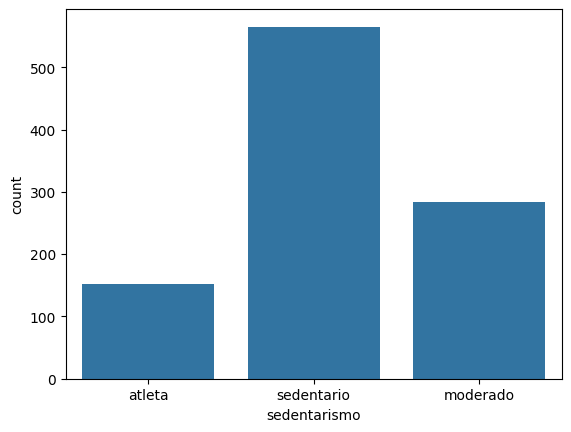

In [43]:
#Gráfico de barras

np.unique(df['sedentarismo'], return_counts=True) #contagem das categórias
sns.countplot(x = df['sedentarismo']);

<ipython-input-53-37c6dd6926a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='bright')


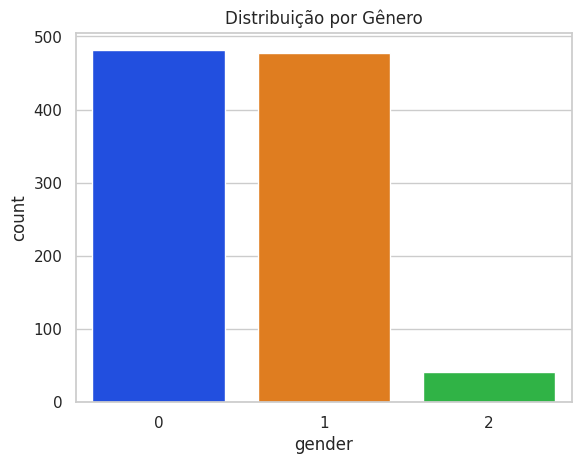

<ipython-input-53-37c6dd6926a1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='parental_education_level', palette='muted')


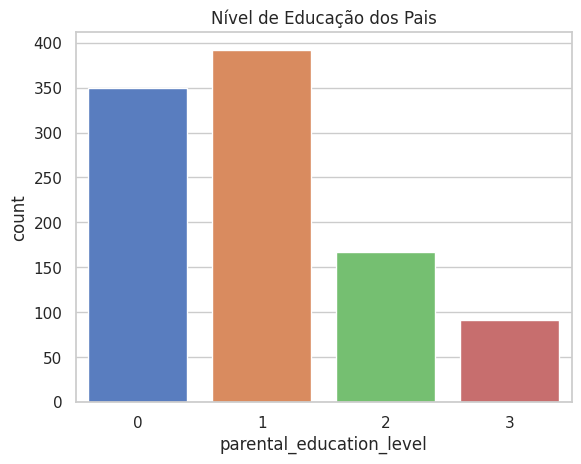

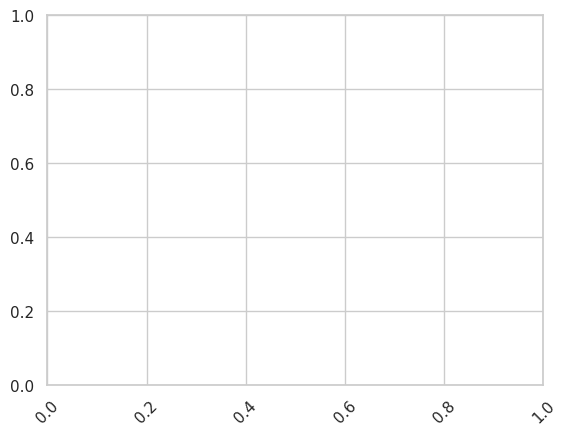

<ipython-input-53-37c6dd6926a1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age', palette='dark')


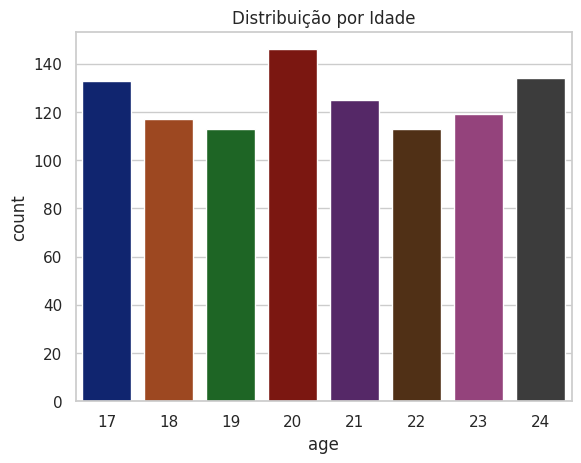

In [53]:
#Gráfico de barras

import seaborn as sns

# Para gênero
sns.countplot(data=df, x='gender', palette='bright')
plt.title('Distribuição por Gênero')
plt.show()

# Para nível de educação dos pais
sns.countplot(data=df, x='parental_education_level', palette='muted')
plt.title('Nível de Educação dos Pais')
plt.show()
plt.xticks(rotation=45)
plt.show()

# Para idade
sns.countplot(data=df, x='age', palette='dark')
plt.title('Distribuição por Idade')
plt.show()

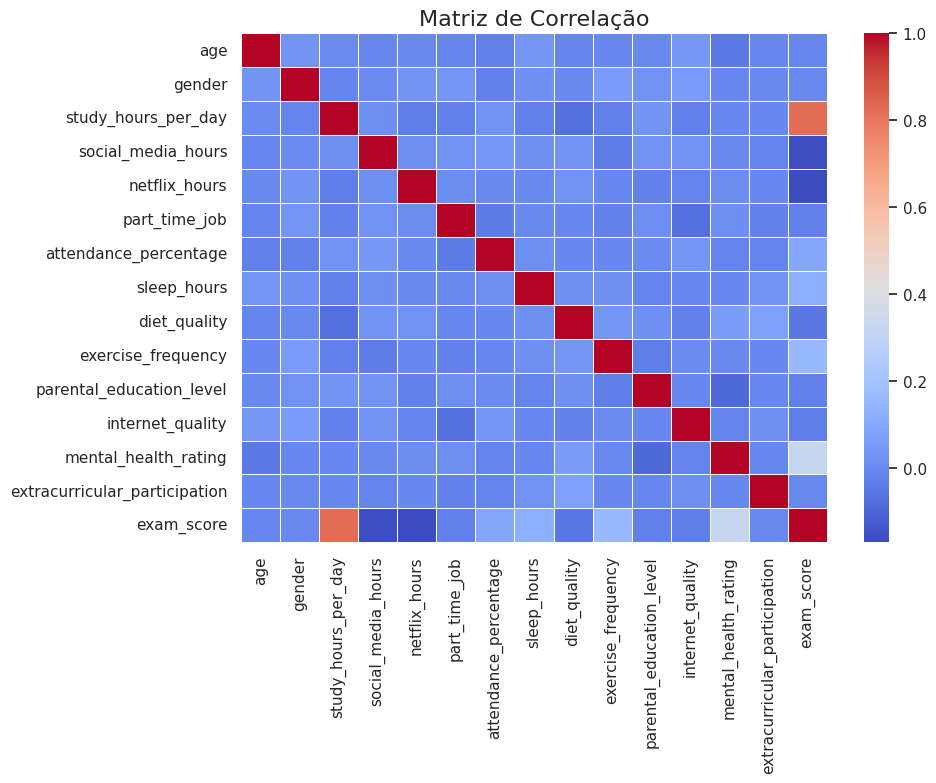

In [58]:
#Mapa de calor

import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a matriz de correlação
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Criando o gráfico de correlação com heatmap sem números
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5, cbar=True)

# Títulos e ajustes
plt.title('Matriz de Correlação', fontsize=16)
plt.tight_layout()
plt.show()


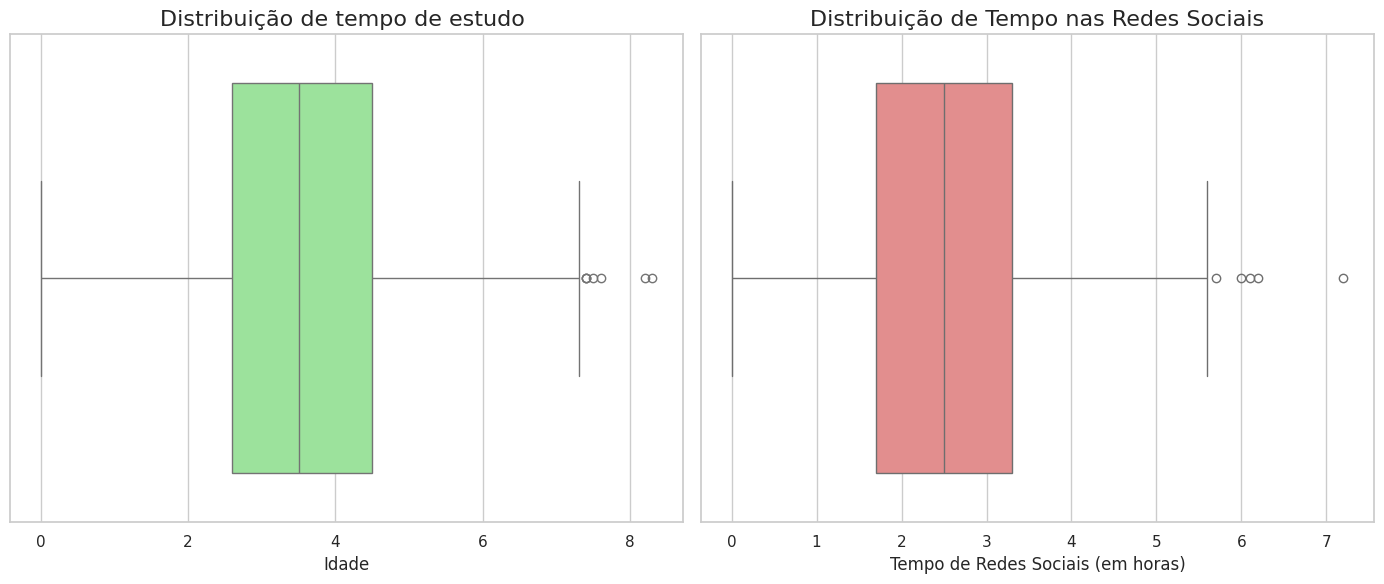

In [65]:
#Boxplot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Boxplot para Idade
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico
sns.boxplot(x=df['study_hours_per_day'], color='lightgreen')
plt.title('Distribuição de tempo de estudo ', fontsize=16)
plt.xlabel('Idade', fontsize=12)

# Boxplot para Tempo de Redes Sociais
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico
sns.boxplot(x=df['social_media_hours'], color='lightcoral')
plt.title('Distribuição de Tempo nas Redes Sociais', fontsize=16)
plt.xlabel('Tempo de Redes Sociais (em horas)', fontsize=12)

# Ajuste final para a visualização
plt.tight_layout()
plt.show()



In [66]:
grafico = px.treemap(df, path=['sleep_hours', 'netflix_hours'])
grafico.show()